In [549]:
# Import data

import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/data/ParisHousing.csv")
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [550]:
data['made'].value_counts()

1992    356
2013    352
2020    336
2018    334
2001    332
2003    332
1996    327
1991    324
2009    324
2011    321
2019    321
1993    320
1998    318
1990    317
1994    312
2014    312
2004    307
2016    307
2015    305
2012    305
2021    304
2007    302
2008    302
1997    296
2005    296
2006    296
2000    295
1999    293
2010    291
2002    290
2017    288
1995    285
Name: made, dtype: int64

In [551]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [552]:
data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


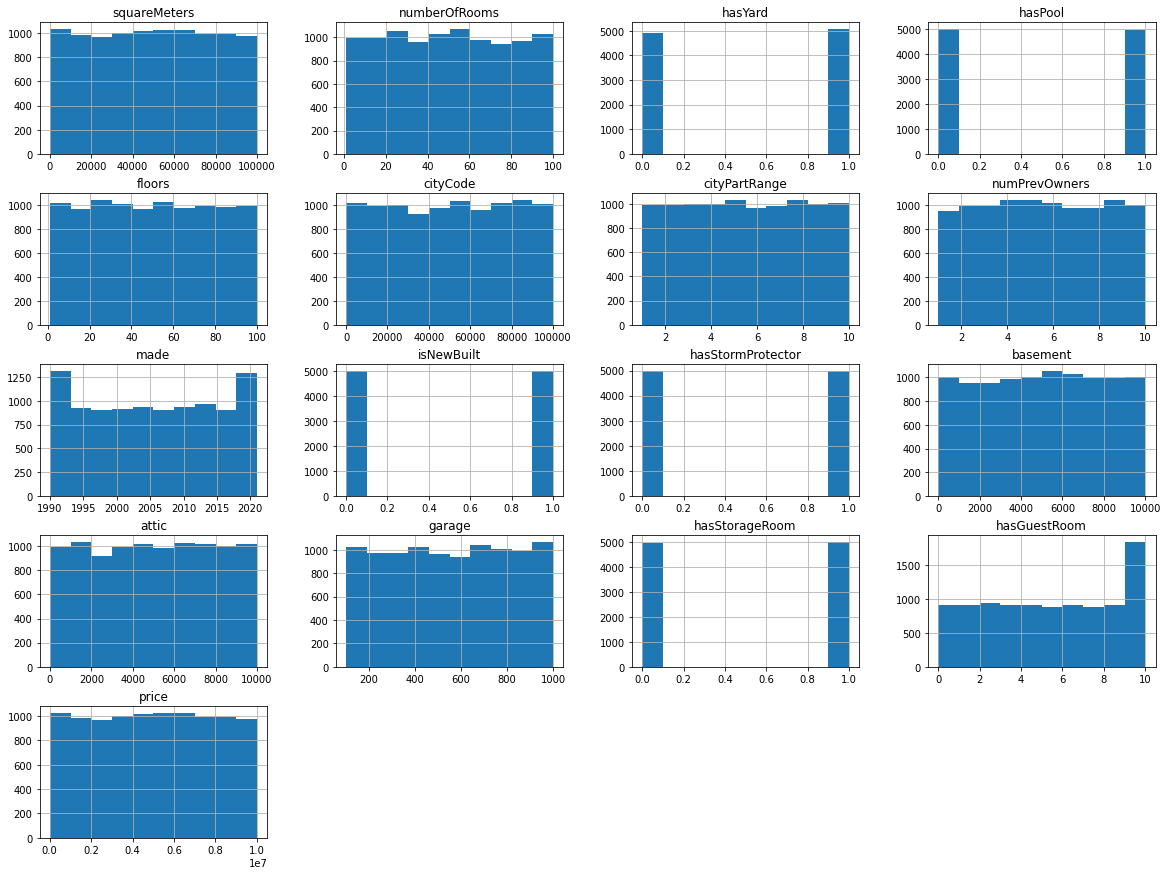

In [553]:
# visualize
import matplotlib.pyplot as plt

data.hist(figsize=(20, 15));

(-489509.385, 10506594.084999999, -4906.5, 104994.5)

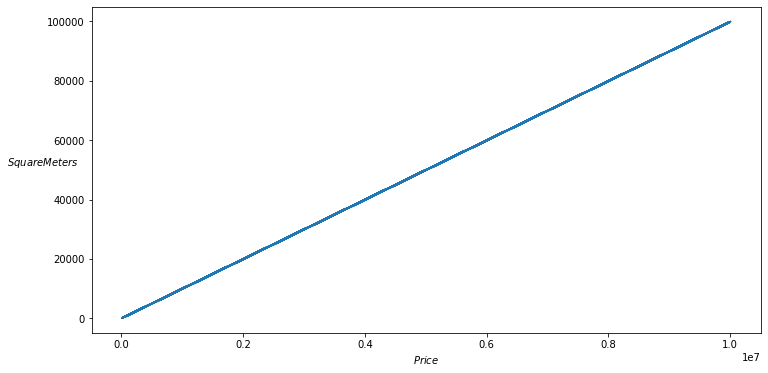

In [554]:
plt.figure(figsize=(12, 6))
plt.plot(data['price'], data['squareMeters'])
plt.xlabel('$Price$', fontsize=10)
plt.ylabel('$Square Meters$', rotation=0, fontsize=10)
plt.axis('auto')

In [555]:
# Correlation
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=False)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
garage              -0.017229
Name: price, dtype: float64

In [556]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

data['totalRoom'] = data['numberOfRooms'] + data['hasGuestRoom']
data = data.drop(['numberOfRooms', 'hasGuestRoom', 'made', 'attic', 'cityCode'], axis=1)

X = data.drop('price', axis=1)
y = data['price']

std = StandardScaler()
X = std.fit_transform(X)

In [577]:
feature = data.columns.values
feature

array(['squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange',
       'numPrevOwners', 'isNewBuilt', 'hasStormProtector', 'basement',
       'garage', 'hasStorageRoom', 'price', 'totalRoom'], dtype=object)

In [557]:
# Train test set
import numpy as np

def train_valid_test_split(data, valid_ratio, test_ratio):
    np.random.seed(10)
    total_size = len(data)
    test_size = int(test_ratio * total_size)
    valid_size = int(valid_ratio * total_size)
    train_size = total_size - test_size - valid_size
    shuffle_indices = np.random.permutation(total_size)
    train_set = shuffle_indices[:train_size]
    valid_set = shuffle_indices[train_size:train_size+valid_size]
    test_set = shuffle_indices[-test_size:]
    return data[train_set], data[valid_set], data[test_set]

def train_test_split(data, test_ratio):
    np.random.seed(10)
    total_size = len(data)
    test_size = int(test_ratio * total_size)
    shuffle_indices = np.random.permutation(total_size)
    train_set = shuffle_indices[:-test_size]
    test_set = shuffle_indices[-test_size:]
    return data[train_set], data[test_set]

In [558]:
# X_train, X_valid, X_test = train_valid_test_split(X, 0.2, 0.2)
# y_train, y_valid, y_test = train_valid_test_split(y, 0.2, 0.2)

X_train, X_test = train_test_split(X, 0.2)
y_train, y_test = train_test_split(y, 0.2)

In [559]:
######## Train model using sklearn ###########
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [560]:
lin_reg.intercept_

4993443.346557731

In [561]:
lin_reg.coef_

array([ 2.87728689e+06,  1.50202339e+03,  1.48845101e+03,  1.56379670e+03,
        1.34409116e+02, -2.90420260e+00,  8.18202621e+01,  7.16601205e+01,
       -3.96308998e+00,  1.77630340e+01,  1.40494968e+01, -1.10845632e+00])

In [562]:
# Evaluation using cross-validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_score = np.sqrt(-score)
lin_rmse_score.mean()

1904.0520065211022

In [563]:
# Evaluation on the test set with sklearn
from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1886.1034068532063

In [564]:
###### Gradient descent #######
np.random.seed(10)
eta = 0.01
m = len(X_train)
n_iterations = 1001

X_with_bias = np.c_[np.ones((len(X_train), 1)), X_train]
theta = np.random.randn(X_with_bias.shape[1])

for iteration in range(n_iterations):
    if iteration % 100 == 0:
        loss = np.sqrt(mean_squared_error(y_train, X_with_bias.dot(theta)))
        print(iteration, loss)
    gradients = 2/m * X_with_bias.T.dot(X_with_bias.dot(theta) - y_train)
    theta = theta - eta*gradients

0 5753319.974222019
100 769526.2075522521
200 103578.55957163317
300 14146.62011157211
400 2692.790425525108
500 1917.9867818248244
600 1900.47812176215
700 1900.1457143196255
800 1900.1393752073047
900 1900.1392533031703
1000 1900.139250940382


In [565]:
theta

array([ 4.99344334e+06,  2.87728688e+06,  1.50202100e+03,  1.48845076e+03,
        1.56379708e+03,  1.34411304e+02, -2.90260635e+00,  8.18202949e+01,
        7.16618200e+01, -3.96278485e+00,  1.77588615e+01,  1.40505717e+01,
       -1.10903952e+00])

In [566]:
# Evaluations test set with gradient descent
X_test_with_bias = np.c_[np.ones((len(X_test), 1)), X_test]
y_predict = X_test_with_bias.dot(theta)
gd_mse = mean_squared_error(y_test, y_predict)
gd_rmse = np.sqrt(gd_mse)
gd_rmse

1886.1038153238587

In [567]:
def concatenate_with_bias(train, val, test):
    return np.c_[np.ones((len(train), 1)), train], np.c_[np.ones((len(val), 1)), val], np.c_[np.ones((len(test), 1)), test]

In [568]:
###### Early stopping #########

X_train, X_valid, X_test = train_valid_test_split(X, 0.1, 0.2)
y_train, y_valid, y_test = train_valid_test_split(y, 0.1, 0.2)

X_train_with_bias, X_valid_with_bias, X_test_with_bias = concatenate_with_bias(X_train, X_valid, X_test)
np.random.seed(10)
eta = 0.01
n_iterations  = 1001
best_loss = np.infty
m = len(X_train)

theta = np.random.randn(X_train_with_bias.shape[1])

for iteration in range(n_iterations):
    gradients = 2/m * X_train_with_bias.T.dot(X_train_with_bias.dot(theta) - y_train)
    theta = theta - eta * gradients
    
    mse_loss = mean_squared_error(y_valid, X_valid_with_bias.dot(theta))
    loss = np.sqrt(mse_loss)

    if iteration % 10 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, 'early stopping!')
        break


0 5453408.381915967
10 4452495.908540931
20 3635653.9009175734
30 2968964.242237921
40 2424771.12400922
50 1980522.580825351
60 1617826.741481029
70 1321682.9248261107
80 1079855.1262923838
90 882361.4761747039
100 721058.1615885291
110 589300.3003728999
120 481665.5076569913
130 393728.5430770864
140 321877.5815254908
150 263164.4045767186
160 215182.2379884594
170 175966.1236123614
180 143911.6610493134
190 117708.72561673846
200 96287.39734629112
210 78773.84739504482
220 64454.34507424818
230 52745.888289876915
240 43172.23688114354
250 35344.353798718985
260 28944.44276763629
270 23712.920734514533
280 19437.785247360334
290 15945.935990487254
300 13096.090014090683
310 10772.994914348114
320 8882.695777606039
330 7348.652042664591
340 6108.531442016327
350 5111.532619524939
360 4316.111113782869
370 3688.0142515745924
380 3198.5799388620894
390 2823.3233590985014
400 2540.895914138771
410 2332.4942060563662
420 2181.689515522989
430 2074.501490487625
440 1999.4783350021362
450 19

In [569]:
theta

array([ 4.99344042e+06,  2.87726906e+06,  1.49563241e+03,  1.47576492e+03,
        1.56919530e+03,  1.40151641e+02,  9.46511276e+00,  7.72768190e+01,
        5.18376874e+01, -1.73682126e+01,  1.60651051e+01,  1.30077473e+00,
       -1.20349970e+01])

In [570]:
# Evaluations test set with early stopping
y_predict = X_test_with_bias.dot(theta)
et_mse = mean_squared_error(y_test, y_predict)
et_rmse = np.sqrt(et_mse)
et_rmse

1886.691733633133

In [571]:
lin_rmse, gd_rmse, et_rmse

(1886.1034068532063, 1886.1038153238587, 1886.691733633133)

In [572]:
import joblib
joblib.dump(lin_reg, 'my_lin_reg_model.pkl')

['my_lin_reg_model.pkl']